In [9]:
import pandas as pd
import numpy as np 
import re
import src.funcionesclean as op
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Storytelling : Cuidado con los clientes!

## Este es Pedro, cliente de nuestra empresa de gestion de datos y propietario de una cadena de hoteles multinacional que esta pensando en expandirse a España.

![](input/empresario.jpg)

### Insertamos la tabla de datos ya limpia con las reviews de España. 

In [10]:
hotel_esp= op.read('output/hotel_esp.csv')
hotel_esp.head()

,Unnamed: 0,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,...,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Month,Year,Hotel_Country,Negative_Review2
0,117428,234 Diputacio Eixample 08007 Barcelona Spain,27,7/2/2017,7.8,Sansi Diputacio,United States of America,First room the air conditioner wasn t working...,60,338,...,1,6.3,"[' Leisure trip ', ' Couple ', ' Double Room '...",32 days,41.388223,2.164455,07Julio,2017,Spain,Aire Acondicionado
1,117429,234 Diputacio Eixample 08007 Barcelona Spain,27,4/14/2017,7.8,Sansi Diputacio,Israel,No Negative,0,338,...,14,9.6,"[' Leisure trip ', ' Couple ', ' Double Room '...",111 day,41.388223,2.164455,04Abril,2017,Spain,Comentario positivo
2,117430,234 Diputacio Eixample 08007 Barcelona Spain,27,4/5/2017,7.8,Sansi Diputacio,Sweden,Seems like the cleaning personal misunderstoo...,59,338,...,6,6.7,"[' Leisure trip ', ' Family with young childre...",120 day,41.388223,2.164455,04Abril,2017,Spain,Suciedad
3,117431,234 Diputacio Eixample 08007 Barcelona Spain,27,7/17/2016,7.8,Sansi Diputacio,United Kingdom,Having a Pool would have been better I felt t...,68,338,...,2,5.8,"[' Leisure trip ', ' Couple ', ' Double Room '...",382 day,41.388223,2.164455,07Julio,2016,Spain,Aire Acondicionado
4,117432,234 Diputacio Eixample 08007 Barcelona Spain,27,6/30/2016,7.8,Sansi Diputacio,Hungary,to be asked to forward my booking com booking...,41,338,...,3,5.8,"[' Business trip ', ' Solo traveler ', ' Doubl...",399 day,41.388223,2.164455,06Junio,2016,Spain,Antiguedad


## Clientes que peores notas ponen

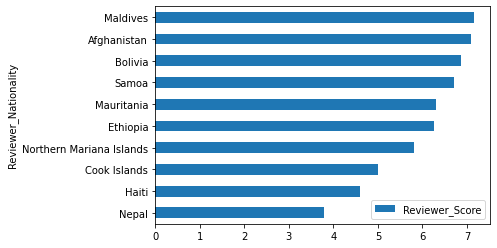

In [12]:
hotel_esp = op.read('output/hotel_esp.csv')
hotel_esp2 =hotel_esp.groupby("Reviewer_Nationality").agg({"Reviewer_Score":"mean"})
hotel_esp2 = hotel_esp2.sort_values(['Reviewer_Score'], ascending = True).head(10)
hotel_esp2.plot.barh();

## Peores notas en la aplicacion segun los meses del año 


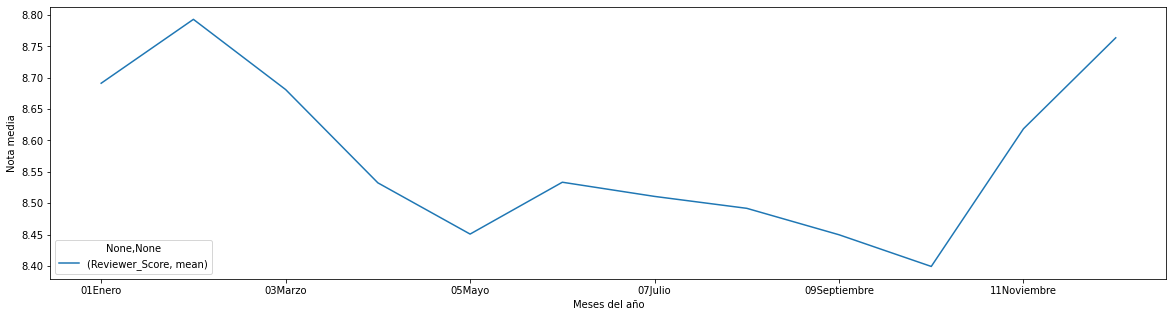

In [13]:
hotel_esp2 =hotel_esp.groupby("Month").agg({"Reviewer_Score":['mean']})
hotel_esp2.plot(figsize=(20, 5))
plt.xlabel('Meses del año')
plt.ylabel('Nota media');

## Las cosas que mas les preocupan a los clientes.

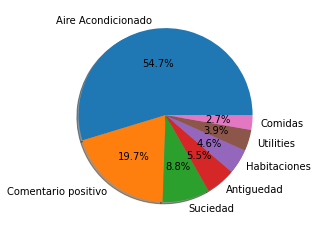

In [15]:
x = list(hotel_esp['Negative_Review2'].value_counts())
labels = pd.unique(hotel_esp['Negative_Review2'])
grafico = plt.pie(x, labels=labels, shadow=True, autopct='%1.1f%%')
plt.show(grafico)